In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df_x = pd.read_csv('Data/linearX.csv')
df_y = pd.read_csv('Data/linearY.csv')

df_x = df_x.reset_index(drop=True)
df_y = df_y.reset_index(drop=True)

merged_df = pd.merge(df_x, df_y, left_index=True, right_index=True)

In [8]:
merged_df.head()

,9.1,0.99523
0,8.0,0.99007
1,9.1,0.99769
2,8.4,0.99386
3,6.9,0.99508
4,7.7,0.99630


In [9]:
merged_df.columns = ['x', 'y']
merged_df = merged_df.reset_index(drop=True)

# Display the updated dataframe
print(merged_df)

       x        y
0    8.0  0.99007
1    9.1  0.99769
2    8.4  0.99386
3    6.9  0.99508
4    7.7  0.99630
..   ...      ...
94   7.8  0.99620
95  10.2  0.99760
96   6.1  0.99464
97   7.3  0.99830
98   7.3  0.99670

[99 rows x 2 columns]


In [10]:
df = merged_df

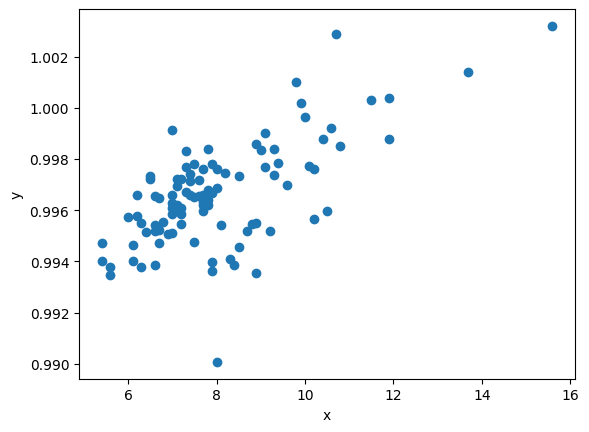

In [11]:
# Linear regression
# y = mx + b
# m is slope, b is y-intercept
# m = (mean(x) * mean(y) - mean(x*y)) / (mean(x)^2 - mean(x^2))
# b = mean(y) - m * mean(x)

# Calculate m and b
def best_fit_slope_and_intercept(xs, ys):
    m = ( ((mean(xs) * mean(ys)) - mean(xs*ys)) /
          ((mean(xs)*mean(xs)) - mean(xs*xs)) )
    b = mean(ys) - m*mean(xs)
    return m, b

# Calculate mean
def mean(values):
    return sum(values) / float(len(values))

# Plot the data
xs = np.array(df['x'], dtype=np.float64)
ys = np.array(df['y'], dtype=np.float64)
plt.scatter(xs, ys)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

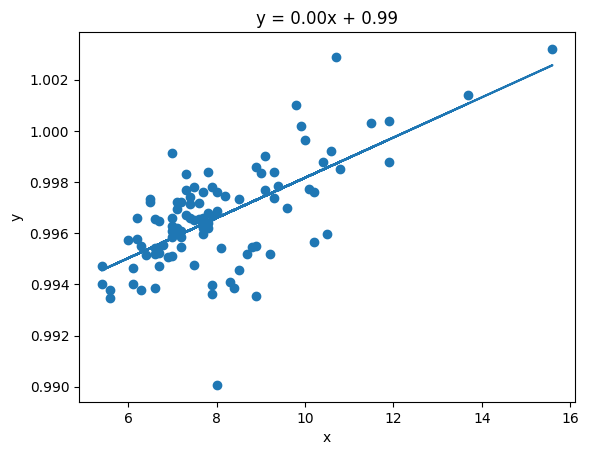

In [12]:
# Plot the regression line
m, b = best_fit_slope_and_intercept(xs, ys)
regression_line = [(m*x)+b for x in xs]
# print(regression_line)
plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.title(f'y = {m:.2f}x + {b:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Enter x: 12


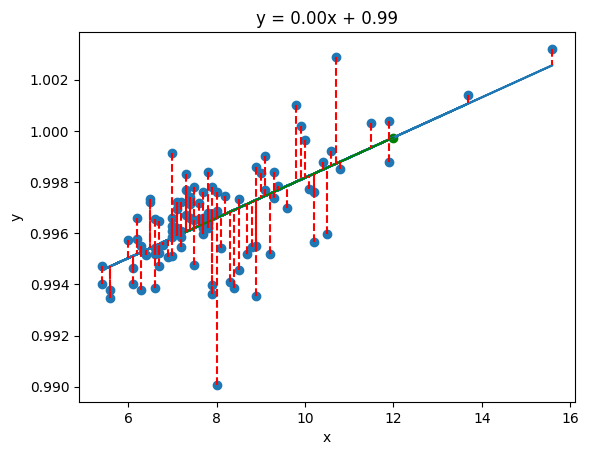

In [13]:
# Predict y for a given x
predict_x = float(input('Enter x: '))
predict_y = (m*predict_x)+b

# Plot the prediction
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, color='g')
plt.plot(xs, regression_line)
# Plot the prediction line
extended_x = [xs[-1], predict_x]
plt.plot(extended_x, [regression_line[-1], predict_y], color='g')
# Plot the errors (a dashed line from (xs, ys) to (xs, point_on_line(xs)))
for i in range(len(xs)):
    plt.plot([xs[i], xs[i]], [ys[i], regression_line[i]], color='r', linestyle='--')
plt.title(f'y = {m:.2f}x + {b:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [31]:
# Calculate squared error
def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

# Calculate coefficient of determination
def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr / squared_error_y_mean)

print("Coefficient of Determination: ", coefficient_of_determination(ys, regression_line))

Coefficient of Determination:  0.4381850455791929


# Using Cost Function
It turns out that to make the best line to model the data, we want to pick parameters $\theta$ that allows our predicted value to be as close to the actual value as possible.

So we formally define a cost function using ordinary least squares that is simply the sum of the squared distances. To find the liner regression line, we minimize:
$$J(\theta_0,\theta_1) = \frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2$$

 - Set your learning rate to 0.5.
 - Gradient descent means taking small steps or jumps until found local minima

In [48]:

# Load independent variable data
independent_data_url = "https://drive.google.com/uc?id=1cFZHElm5ebn1OolgmrLOxw91T8am3S5C"
independent_data = pd.read_csv(independent_data_url)

# Load dependent variable data
dependent_data_url = "https://drive.google.com/uc?id=1rY3oTHxa1FT3fdcjWuKKQ4DOXnU8AeQM"
dependent_data = pd.read_csv(dependent_data_url)

In [49]:
# Initialize parameters
theta0 = 0
theta1 = 0
learning_rate = 0.5

In [51]:
def hypothesis(theta0, theta1, x):
    return theta0 + theta1 * x

def cost_function(theta0, theta1, x, y):
    m = len(x)
    predictions = hypothesis(theta0, theta1, x)
    errors = predictions - y
    return (1 / (2 * m)) * np.sum(errors**2)

In [52]:
def gradient_descent(theta0, theta1, x, y, learning_rate, epochs):
    m = len(x)
    
    for epoch in range(epochs):
        predictions = hypothesis(theta0, theta1, x)

        errors = predictions - y

        theta0 -= (learning_rate / m) * np.sum(errors)
        theta1 -= (learning_rate / m) * np.sum(errors * x)

        print(f"Epoch {epoch}, theta0: {theta0}, theta1: {theta1}")

    return theta0, theta1

In [69]:
max_epochs = 1000
cost_threshold = 1e-5
previous_cost = float('inf')

for epoch in range(max_epochs):
    current_cost = cost_function(theta0, theta1, independent_data, dependent_data)

    print(f"Epoch {epoch}, Cost: {current_cost}, theta0: {theta0}, theta1: {theta1}")

    if (previous_cost - current_cost).any() < cost_threshold:
        print(f"Converged at epoch {epoch}")
        break

    theta0, theta1 = gradient_descent(theta0, theta1, independent_data, dependent_data, learning_rate, 1)

    previous_cost = current_cost

Epoch 0, Cost: 0.99523    0.0
9.1        0.0
dtype: float64, theta0: 0.99523    0.0
9.1        0.0
dtype: float64, theta1: 0.99523    0.0
9.1        0.0
dtype: float64
Epoch 0, theta0: 0.99523    0.0
9.1        0.0
dtype: float64, theta1: 0.99523    0.0
9.1        0.0
dtype: float64
Epoch 1, Cost: 0.99523    0.0
9.1        0.0
dtype: float64, theta0: 0.99523    0.0
9.1        0.0
dtype: float64, theta1: 0.99523    0.0
9.1        0.0
dtype: float64
Converged at epoch 1
